In [2]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from PIL import Image

np.random.seed(42)

Matplotlib is building the font cache; this may take a moment.


In [3]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

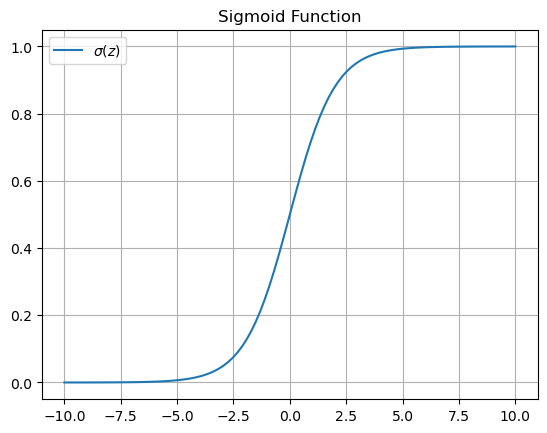

In [4]:
x=np.linspace(-10,10,100)
plt.plot(x,sigmoid(x), label = fr"$\sigma (z)$")
plt.grid(True)
plt.legend()
plt.title("Sigmoid Function")
plt.show()